<a href="https://colab.research.google.com/github/25thBaamDice/SerieDeTiempo/blob/main/An%C3%A1lisis_descriptivo_series_de_tiempo_Volumen_Precipitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis descriptivo series de tiempo - Volumén de Precipitación Municipio Villapinzón**

Los datos fueron rescatados de la Corporación Autónoma Regional de Cundinamarca (CAR). El registro toma desde enero del 1963 hasta marzo del 2018.

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

In [10]:
from platform import python_version
print(python_version())
import pandas as pd

3.7.13


## **Importar los datos.**

Se lee el archivo donde están los datos.

In [11]:
VolPrec = pd.read_csv('Datos_Serie.csv')

Un primer vistazo a los datos.

In [12]:
print('\n Shape of the data:')
print(VolPrec.shape)
VolPrec.head()


 Shape of the data:
(663, 2)


,Fecha,VolPrec
0,1963-01-01,14.5
1,1963-02-01,48.0
2,1963-03-01,16.0
3,1963-04-01,102.0
4,1963-05-01,182.5


Cambiar el indice de los datos con $()index$ y se re-organiza los datos.

In [13]:
# creando el dataframe con la fecha y la variable de interes.
VolPrec['Fecha'] = pd.to_datetime(VolPrec.Fecha,format='%Y-%m-%d')
VolPrec.index = VolPrec['Fecha']

# re-organizando los datos por fecha si es necesario
VolPrec = VolPrec.sort_index(ascending=True, axis=0)
VP1 = pd.DataFrame(VolPrec[['Fecha', 'VolPrec']])

#Poniendo los indices
VP1.index = VP1.Fecha
VP1.drop('Fecha', axis=1, inplace=True)
VP1.head()
VP1.tail()

,VolPrec
Fecha,
1963-01-01,14.5
1963-02-01,48.0
1963-03-01,16.0
1963-04-01,102.0
1963-05-01,182.5


,VolPrec
Fecha,
2017-11-01,47.0
2017-12-01,64.0
2018-01-01,21.9
2018-02-01,49.1
2018-03-01,45.8


## **Primer Gráfico de la serie de tiempo**

Se hace un gráfico ilustrativo para ver el comportamiento de la serie, determinar caracteristicas que puedan verse a simple vista, como tendencia o estacionalidad.

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Volumen de precipitación mensual en Villapinzón')

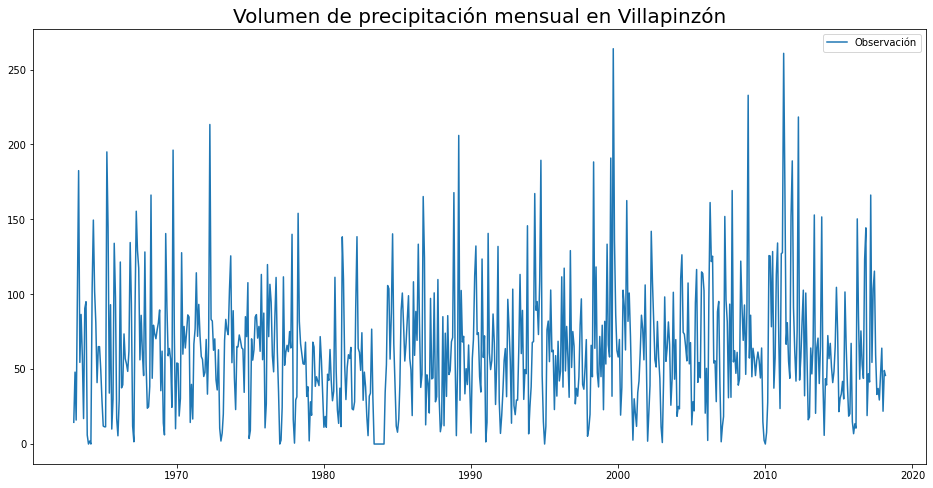

In [14]:
plt.figure(figsize=(16,8))
plt.plot(VP1, label='Observación')
plt.title("Volumen de precipitación mensual en Villapinzón", size = 20)
plt.legend()
plt.show()

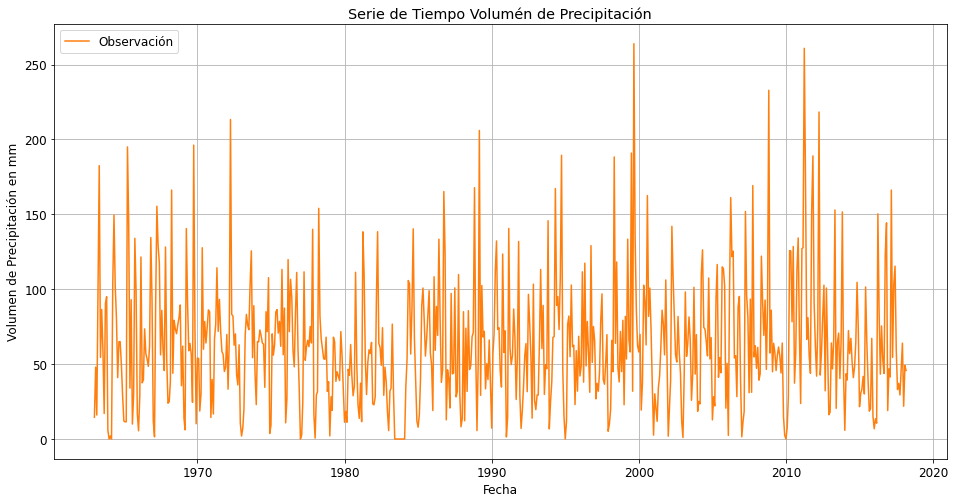

In [15]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(VP1, color='tab:orange', label='Observación')
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen de Precipitación en mm')
ax.set_title('Serie de Tiempo Volumén de Precipitación')
ax.grid(True)
ax.legend(loc='upper left');

## **Análisis de tendencia**
### **Gráficos de autocorrelación**

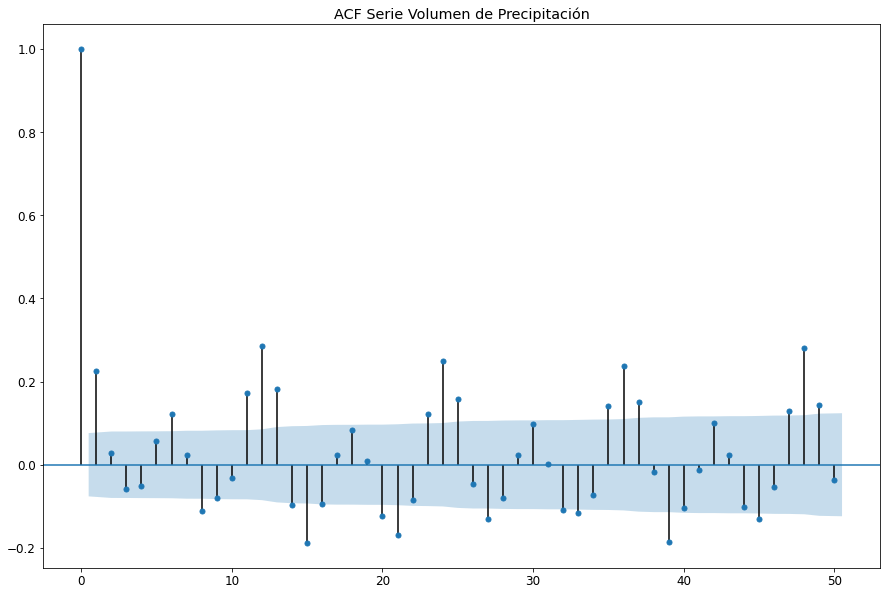

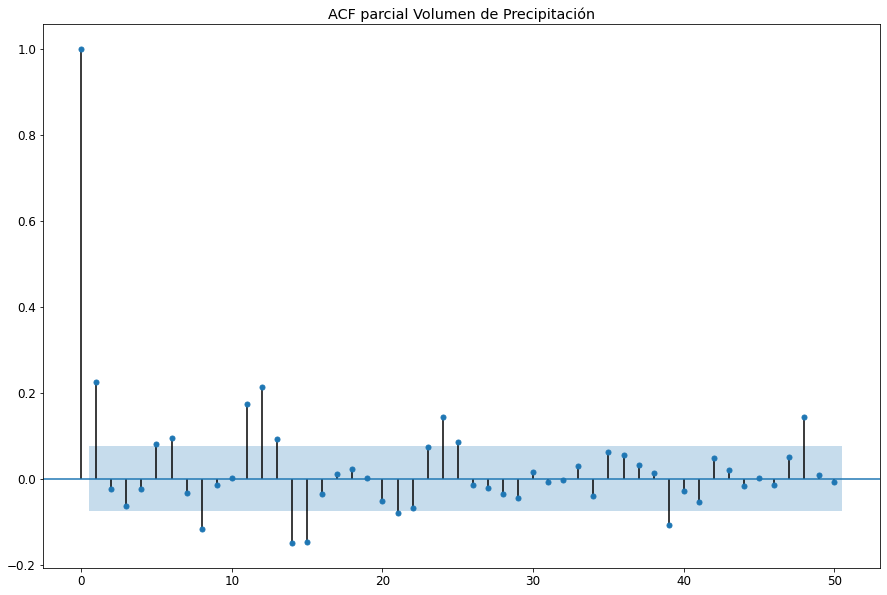

In [16]:
a=plot_acf(VP1,lags=50,title='ACF Serie Volumen de Precipitación')
b=plot_pacf(VP1,lags=50,title='ACF parcial Volumen de Precipitación')

## **Análisis de tendencia utilizando lowess**

In [17]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess

In [18]:
n = VP1.shape[0]
print(n)

663


In [19]:
lowess_VP = lowess(VP1['VolPrec'], np.arange(n), is_sorted=True, frac=0.05, it=0)
lowess_x = list(zip(*lowess_VP))[0]
lowess_y = list(zip(*lowess_VP))[1]

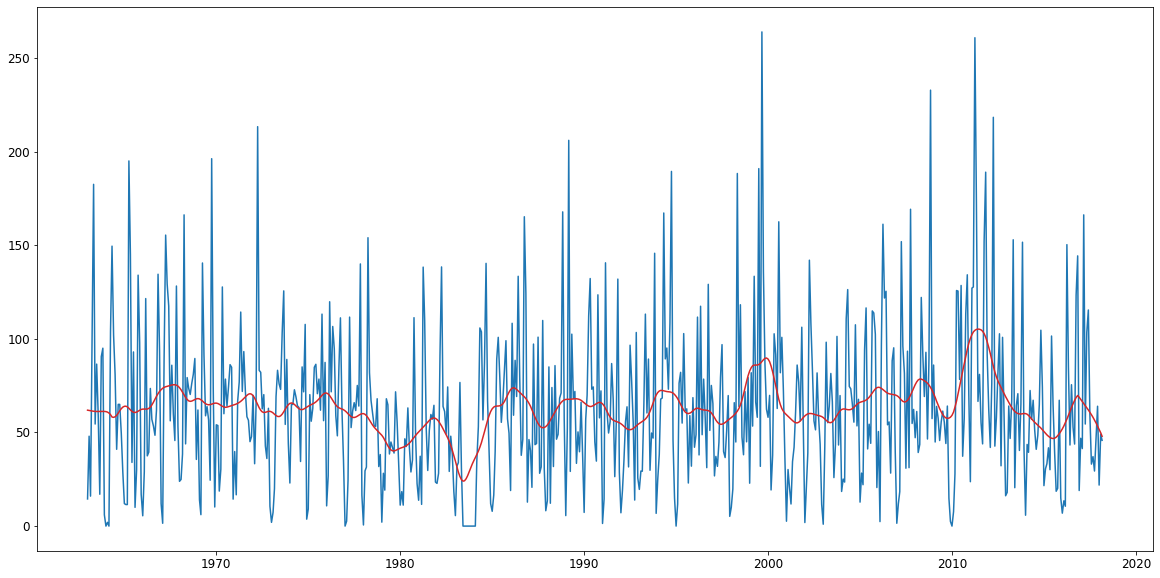

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(VolPrec.index, VolPrec['VolPrec'], '-')
ax.plot(VolPrec.index, lowess_y, '-', color='tab:red')

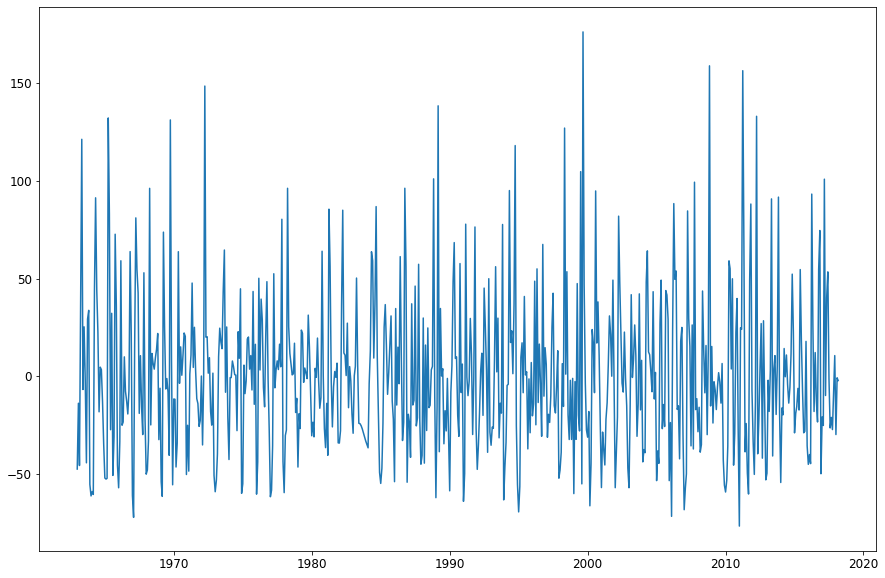

In [21]:
y=VP1.values
trend=lowess_y
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(VP1))]
# plot detrended
VP_detrend=pd.Series(detrended,index=VP1.index)
plt.plot(VP_detrend)
plt.show()

## **Análisis de retardos**

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 't vs t-1')

Text(0.5, 1.0, 't vs t-2')

Text(0.5, 1.0, 't vs t-3')

Text(0.5, 1.0, 't vs t-4')

Text(0.5, 1.0, 't vs t-5')

Text(0.5, 1.0, 't vs t-6')

Text(0.5, 1.0, 't vs t-7')

Text(0.5, 1.0, 't vs t-8')

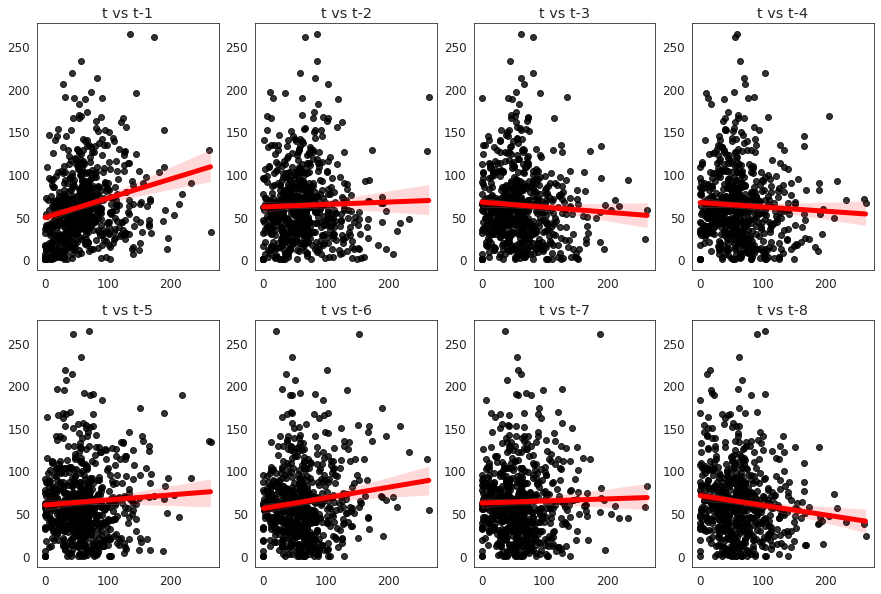

In [22]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(VP1.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black", 
            line_kws={"color":"red", "linewidth":5})
plt.show()

## **Modelo utilizando redes neuronales (LSTM)**
### **Importando la librería.**

In [23]:
import tensorflow as tf
import statsmodels.api as sm
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

Versión de Tensorflow:  2.8.0


### **Hallar el número de retardos necesarios**

In [24]:
pacf = sm.tsa.stattools.pacf(VP1["VolPrec"], nlags=50)

In [25]:
T = len(VP1["VolPrec"])

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)

### **Conjunto de entrenamiento y validación.**

In [26]:
len_VP = len(VP1)
len_train = int(len_VP*0.8) # 80%  = 2415
len_test = len_VP- len_train # 20% = 604
print (len_VP, '=', len_train, '+',len_test)

663 = 530 + 133


### **Gráfico de conjunto de entrenamiento y validación.**

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Volumen de precipitación mensual en Villapinzón')

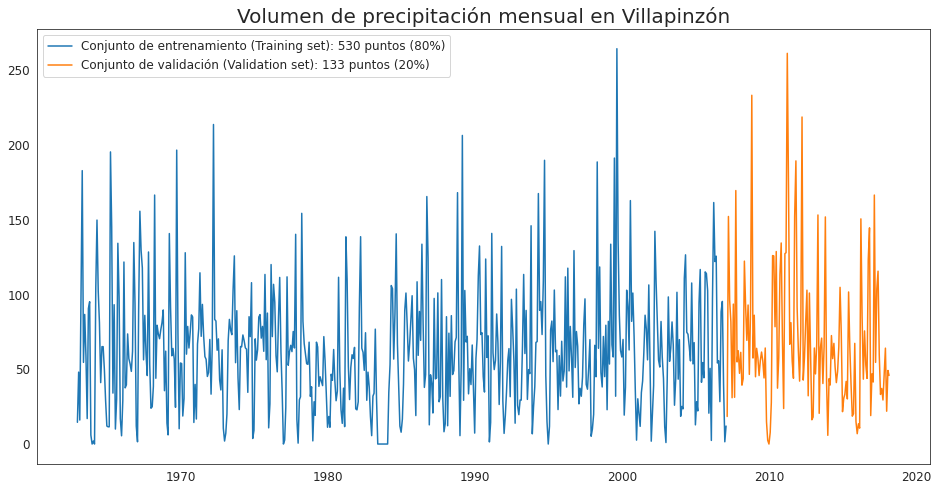

In [27]:
plt.figure(figsize=(16,8))
plt.plot(VP1[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(VP1['VolPrec'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) 
plt.title("Volumen de precipitación mensual en Villapinzón", size = 20)
plt.legend()
plt.show()

### **Preparación de los datos**

In [28]:
#creating train and test sets
dataset = VP1.values


# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [29]:
dataset.shape

(663,)

In [30]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)

Se pone una semilla aleatoria.

In [31]:
tf.random.set_seed(1234)
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada
future_target = 1 # días adelante
TRAIN_SPLIT = int(len_VP*0.8) #2415: nuḿero de datos entrenamiento

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, 0, TRAIN_SPLIT,
                                           past_history,
                                           future_target)
#
#secuencias de validación
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT, None,
                                       past_history,
                                       future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

530
(470, 60, 1)
(470,)
(72, 60, 1)
(72,)


## **Modelo LSTM**

In [32]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.2, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.2, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

### Se entrena al modelo.

In [34]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/20
14/14 [==============================] - 3s 70ms/step - loss: 0.0379 - val_loss: 0.0259
Epoch 2/20
14/14 [==============================] - 0s 31ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 3/20
14/14 [==============================] - 0s 31ms/step - loss: 0.0240 - val_loss: 0.0232
Epoch 4/20
14/14 [==============================] - 0s 30ms/step - loss: 0.0238 - val_loss: 0.0232
Epoch 5/20
14/14 [==============================] - 0s 30ms/step - loss: 0.0238 - val_loss: 0.0229
Epoch 6/20
14/14 [==============================] - 0s 29ms/step - loss: 0.0241 - val_loss: 0.0228
Epoch 7/20
14/14 [==============================] - 0s 31ms/step - loss: 0.0242 - val_loss: 0.0228
Epoch 8/20
14/14 [==============================] - 0s 30ms/step - loss: 0.0244 - val_loss: 0.0225
Epoch 9/20
14/14 [==============================] - 0s 28ms/step - loss: 0.0238 - val_loss: 0.0224
Epoch 10/20
14/14 [==============================] - 0s 28ms/step - loss: 0.0239 - val_loss: 0.0224
Epoch 11/

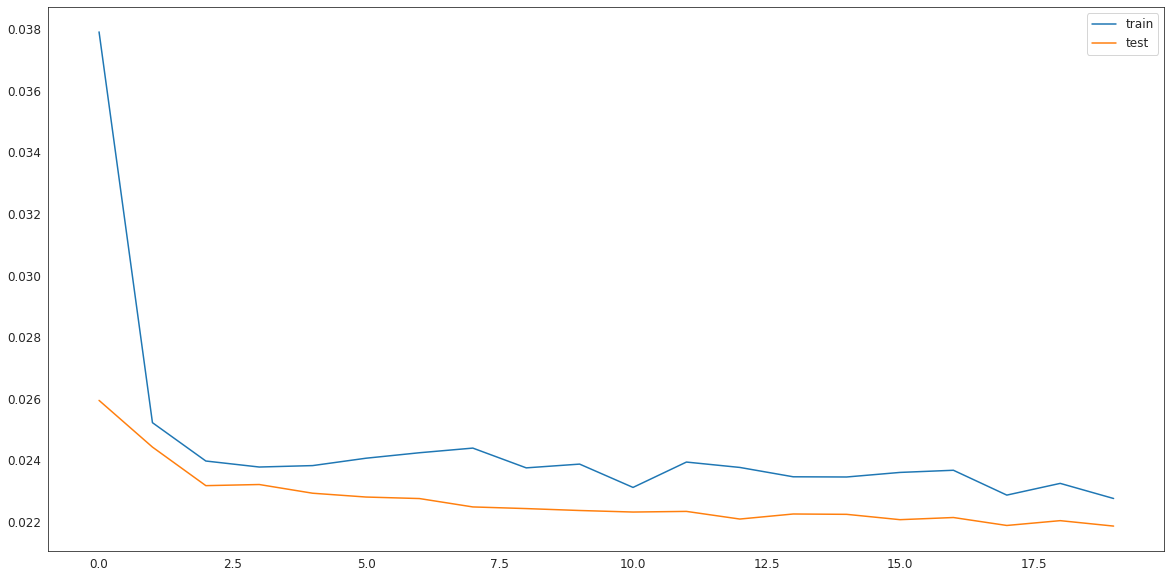

In [35]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend();

### Datos de validación.

In [36]:
X_test.shape

(72, 60, 1)

### Calcula predicciones.

In [37]:
prediction1 = model_01.predict(X_test)

In [38]:
print(prediction1.shape)
print(y_test.shape)

(72, 1)
(72,)


### Elimina dimesiones sobrantes para los gráficos.

In [39]:
y_train_p1 = y_train #np.squeeze(y_train, axis=-1)
y_test_p1 = y_test#np.squeeze(y_test, axis=-1)
y_pred_p1 = np.squeeze(prediction1, axis=-1)

In [40]:
print(y_train_p1.shape)
print(y_test_p1.shape)
print(y_pred_p1.shape)

k=0
for i,j in zip(y_test_p1, y_pred_p1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(470,)
(72,)
(72,)
0.8272072754831377 0.24146587 0.5857414089174333
0.16180371352785147 0.24477565 -0.08297193935758554
0.21978021978021978 0.25905445 -0.03927423240064265
0.3088291019325502 0.24622525 0.06260384918501449
0.3891625615763547 0.24456081 0.1446017536330106
0.12201591511936341 0.24608475 -0.1240688345792755
0.38196286472148544 0.24836254 0.13360032352275497
0.21674876847290642 0.24261945 -0.02587068638778084
0.06138688897309587 0.24708913 -0.18570224369349198
0.06820765441455097 0.24394998 -0.17574232512913496


### **Gráfica de predicciones**

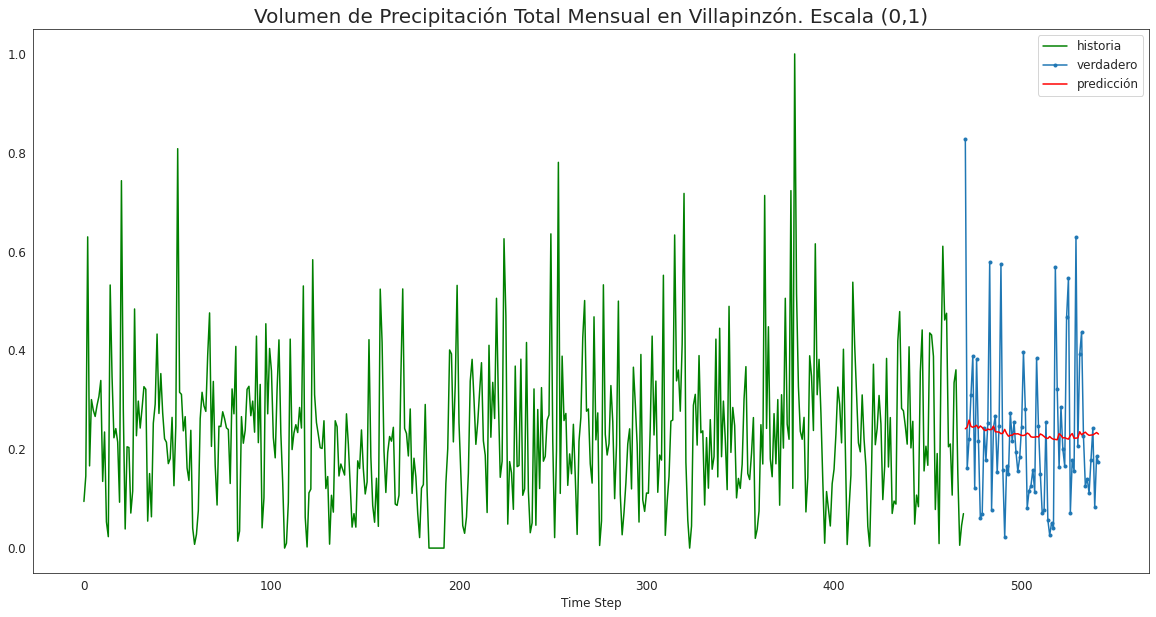

In [41]:
plt.plot(np.arange(0, len(y_train_p1)), y_train_p1, 'g', label="historia")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_test_p1, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_pred_p1, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Volumen de Precipitación Total Mensual en Villapinzón. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [42]:
y_pred_or1 = scaler.inverse_transform(y_pred_p1.reshape(-1,1))
y_test_or1 = scaler.inverse_transform(y_test_p1.reshape(-1,1))

In [43]:
k=0
for i,j in zip(y_test_or1, y_pred_or1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[218.3] [63.722843] [154.57715683]
[42.7] [64.5963] [-21.89629822]
[58.] [68.36447] [-10.36447144]
[81.5] [64.97884] [16.52115631]
[102.7] [64.5396] [38.16040344]
[32.2] [64.941765] [-32.74176483]
[100.8] [65.54288] [35.2571228]
[57.2] [64.027275] [-6.82727509]
[16.2] [65.206825] [-49.00682526]
[18.] [64.3784] [-46.37840271]


In [44]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or1-y_test_or1,2)))
print(rmsLSTM )

41.337251589913144


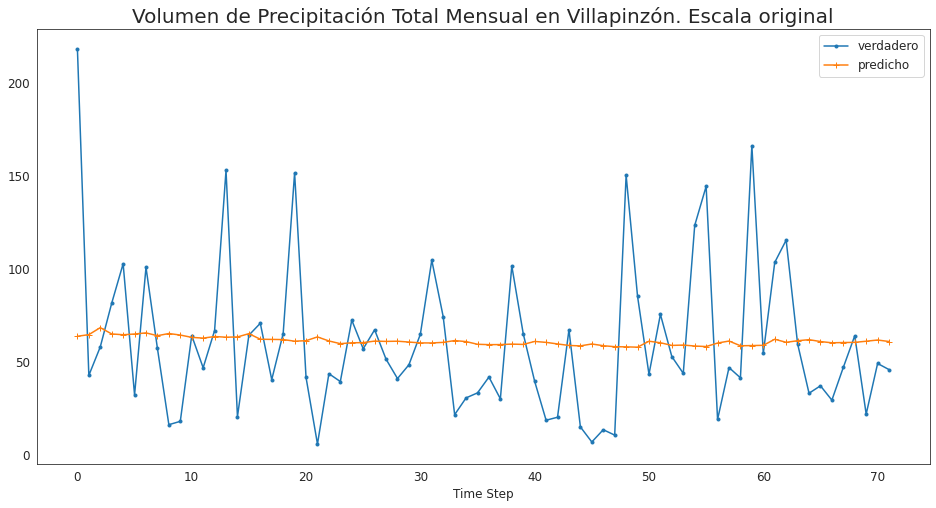

In [45]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_or1)), y_pred_or1, marker='+', label="predicho")
plt.xlabel('Time Step')
#plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(40, 20), size = 15)
#plt.annotate("modelo = LSTM(50), timestep=60" , xy=(40, 19.5), size = 15)
#plt.annotate("epochs=40" , xy=(40, 19), size = 15)
plt.title("Volumen de Precipitación Total Mensual en Villapinzón. Escala original", size = 20)
plt.legend()
plt.show();

### Residuos

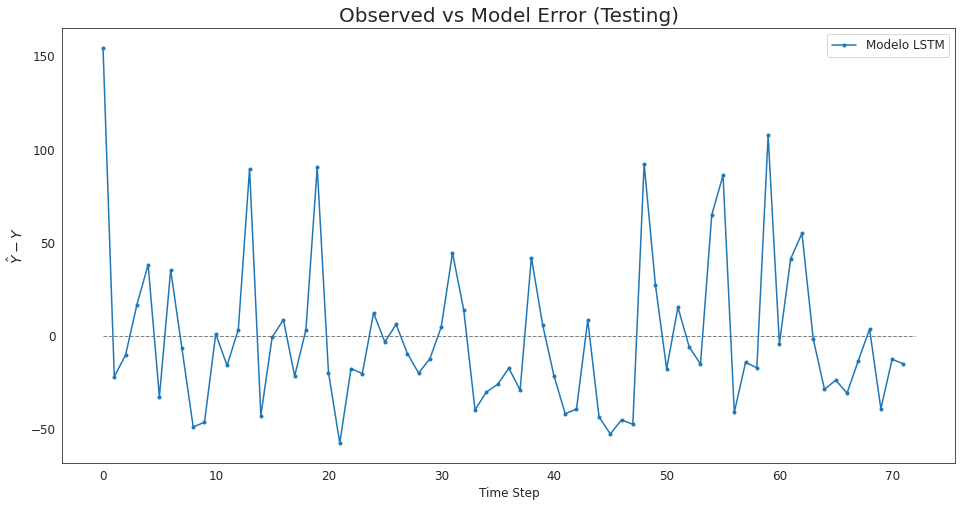

In [46]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1-y_pred_or1, marker='.', label="Modelo LSTM")
plt.hlines(y=0, xmin=0, xmax=len(y_test_or1), colors='grey', linestyles='--', lw=1, )
plt.title("Observed vs Model Error (Testing)", size = 20)
plt.ylabel('$\hat{Y}-Y$', fontsize=14)
plt.xlabel('Time Step')
plt.legend()
plt.show();

## **Modelo con suavizamiento Exponencial**

### Importando librerias

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

In [48]:
fitexp = SimpleExpSmoothing(VP1).fit(smoothing_level=0.2, optimized=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


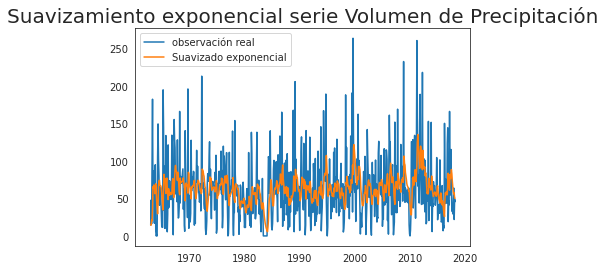

In [49]:
plt.plot(VP1,label="observación real")
plt.plot(fitexp.fittedvalues, label="Suavizado exponencial")
plt.title("Suavizamiento exponencial serie Volumen de Precipitación", size = 20)
plt.legend()
plt.show();

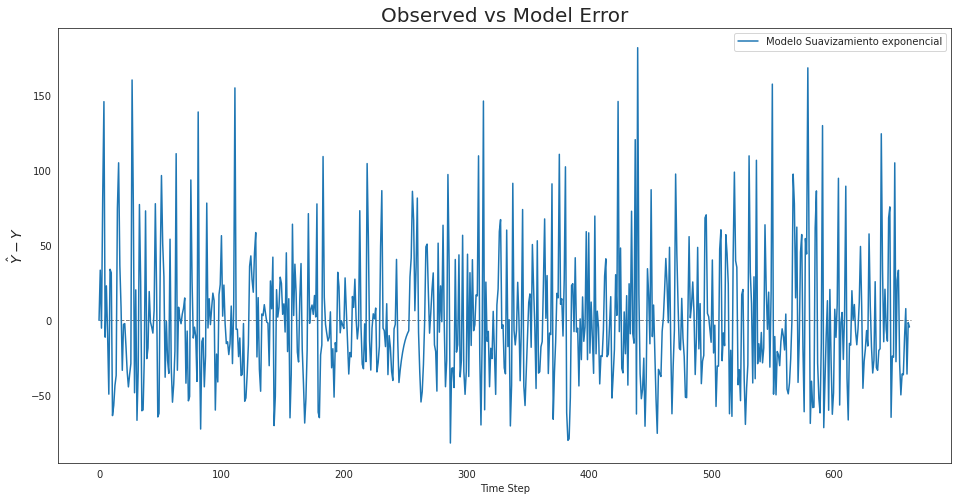

In [50]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(VP1)), VP1["VolPrec"]-fitexp.fittedvalues.values, label="Modelo Suavizamiento exponencial")
plt.hlines(y=0, xmin=0, xmax=len(VP1), colors='grey', linestyles='--', lw=1, )
plt.title("Observed vs Model Error", size = 20)
plt.ylabel('$\hat{Y}-Y$', fontsize=14)
plt.xlabel('Time Step')
plt.legend()
plt.show();

## **Comparación de modelos**

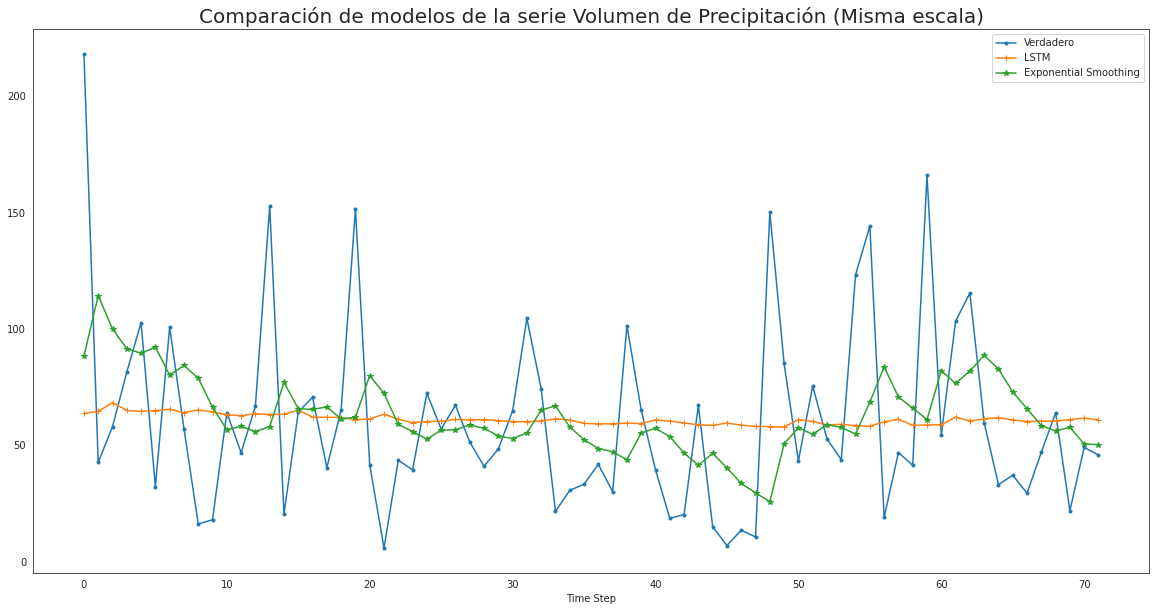

In [51]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="Verdadero")
plt.plot(np.arange(0, len(y_test_or1)), y_pred_or1, marker='+', label="LSTM")
plt.plot(np.arange(0, len(y_test_or1)), fitexp.fittedvalues.values[len(VP1)-len(y_test_or1):], marker='*', label="Exponential Smoothing")
plt.xlabel('Time Step')
plt.title("Comparación de modelos de la serie Volumen de Precipitación (Misma escala)", size = 20)
plt.legend()
plt.show();

### Residuos

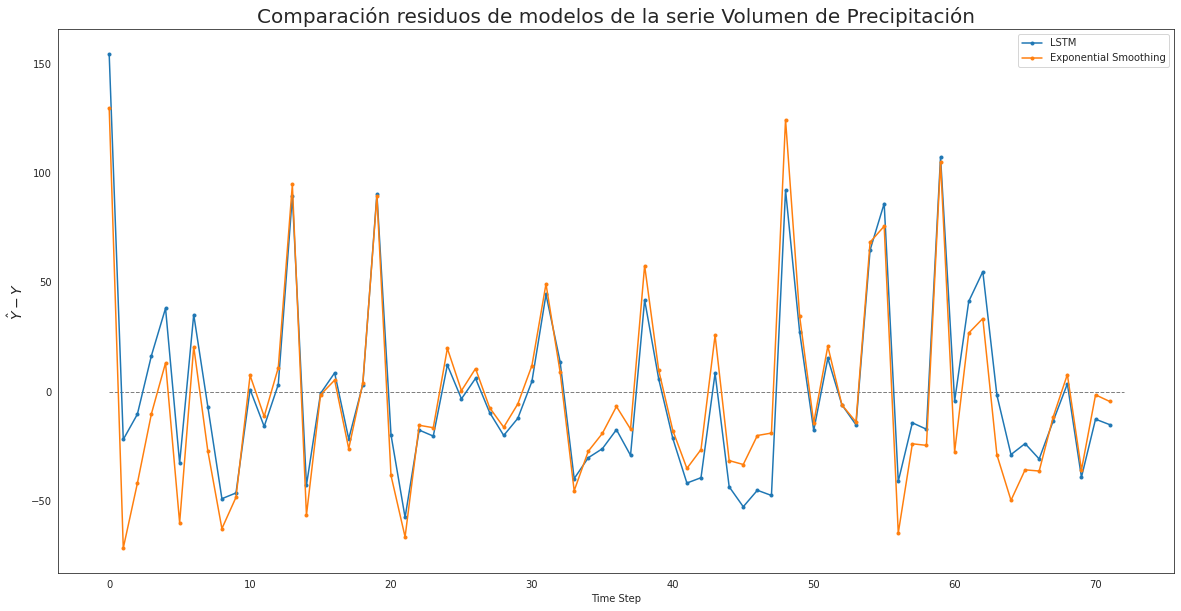

In [53]:
re_VP1exps_pred=VP1["VolPrec"]-fitexp.fittedvalues.values
resi_VP1exps_pred=re_VP1exps_pred[len(VP1)-len(y_test_or1):]

plt.figure(figsize=(20,10))
re_VP1exps_pred=fitexp.fittedvalues.values[len(VP1)-len(y_test_or1):]
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1-y_pred_or1, marker='.', label="LSTM")
plt.plot(np.arange(0, len(y_test_or1)), resi_VP1exps_pred, marker='.', label="Exponential Smoothing")
plt.xlabel('Time Step')
plt.title("Comparación residuos de modelos de la serie Volumen de Precipitación", size = 20)
plt.ylabel('$\hat{Y}-Y$', fontsize=14)
plt.hlines(y=0, xmin=0, xmax=len(y_test_or1), colors='grey', linestyles='--', lw=1, )
plt.legend()
plt.show();